# Analytic Report and Research Proposal

For this assignment, I will be looking at a data set of wine quality. The data set was downloaded and Kaggle.com, and original source of the data is the UCI Machine Learning Repository. The data set can be found [here](https://www.kaggle.com/rajyellow46/wine-quality).     

## First Steps

To begin, let's start by importing the packages we are going to use.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Now that the packages have been imported, lets get the data into a data frame.

In [2]:
data = pd.read_csv("winequalityN.csv") 

Let's now start clean and explore the data.

## Data Cleaning

To clean the data, we are going to check if there are any null values in or data frame. If there are, we will replace the blank cells with the mean of the rest of the column.

In [3]:
Sum = data.isnull().sum()
Percentage = ( data.isnull().sum()/data.isnull().count())

pd.concat([Sum,Percentage], axis =1, keys= ['Sum', 'Percentage'])

,Sum,Percentage
type,0,0.000000
fixed acidity,10,0.001539
volatile acidity,8,0.001231
citric acid,3,0.000462
residual sugar,2,0.000308
chlorides,2,0.000308
free sulfur dioxide,0,0.000000
total sulfur dioxide,0,0.000000
density,0,0.000000
pH,9,0.001385


Looks like we have a few blank cells. Let's clean the data.

This will fill in any cell with a null value with the mean of the column.

In [4]:
def null_cell(data): 
    total_missing_values = data.isnull().sum() 
    missing_values_per = data.isnull().sum()/data.isnull().count() 
    null_values = pd.concat([total_missing_values, missing_values_per], axis=1, keys=['total_null', 'total_null_perc']) 
    null_values = null_values.sort_values('total_null', ascending=False) 
    return null_values[null_values['total_null'] > 0] 

fill_list = (null_cell(data)).index

data_clean = data.copy()

for col in fill_list:
    data_clean.loc[:, col].fillna(data_clean.loc[:, col].mean(), inplace=True)

In [5]:
Sum = data_clean.isnull().sum()
Percentage = ( data_clean.isnull().sum()/data_clean.isnull().count())

pd.concat([Sum,Percentage], axis =1, keys= ['Sum', 'Percentage'])

,Sum,Percentage
type,0,0.0
fixed acidity,0,0.0
volatile acidity,0,0.0
citric acid,0,0.0
residual sugar,0,0.0
chlorides,0,0.0
free sulfur dioxide,0,0.0
total sulfur dioxide,0,0.0
density,0,0.0
pH,0,0.0


## Data Exploration

Questions to Answer

There are three questions I want to answer with this dataset:

First, what are some of the differences with the variables between white and red wines?

Second: what are some of the differences with the variables between higher and lower quality wines?

Third: how do the lowest quality wines compare to the average wines?

To answer the first question, let's begin by splitting the data by type of wine.

In [6]:
datawhite = data_clean[data_clean.type == 'white']
datared = data_clean[data_clean.type == 'red']

Now that they are split, let's take a look at the summary stats to see if any differences come to mind.

In [7]:
datawhite.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.856121,0.278340,0.334244,6.392862,0.045783,35.308085,138.360657,0.994027,3.188246,0.489851,10.514267,5.877909
std,0.843244,0.100766,0.120961,5.071275,0.021846,17.007137,42.498065,0.002991,0.150910,0.114127,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [8]:
datared.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.320721,0.527620,0.271175,2.538806,0.087467,15.874922,46.467792,0.996747,3.310748,0.657919,10.422983,5.636023
std,1.740116,0.179091,0.194687,1.409928,0.047065,10.460157,32.895324,0.001887,0.154228,0.169547,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Looking at the means, we can see that some variables between the two types are similar, and some are very different.
Quality, pH, and alcohol are close between the two types, while total sulfur dioxide, residual sugar, and sulphates are not.
Let's use some graphs to get a visual idea.

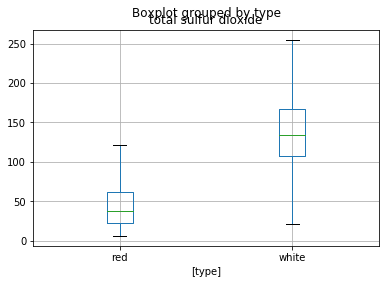

In [9]:
dataTSD = data_clean[['type','total sulfur dioxide']]
dataTSD
dataTSD.boxplot(by='type',showfliers=False)

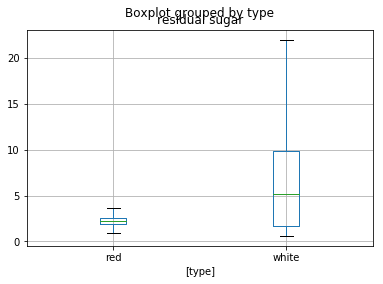

In [10]:
dataSUG = data_clean[['type','residual sugar']]
dataSUG.boxplot(by='type',showfliers=False)

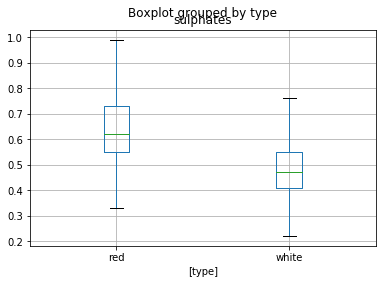

In [11]:
dataSUL = data_clean[['type','sulphates']]
dataSUL.boxplot(by='type',showfliers=False)

As we can see, the white and red wines in this dataset differ greatly in sulfur dioxide, residual sugar, and sulphates.

To answer the second question, let's begin by splitting the data by quality.

First, we'll find the average quality of wines. This will help us when dividing the wines into higher and lower qualities.

In [12]:
data_clean['quality'].mean()

5.818377712790519

Now, let's split the data. We'll call wines with a quality above 5.8 "higher quality", and wines below 5.8 "lower quality". Next, we'll show the summary statisitics.

In [13]:
dataHQ = data_clean[data.quality > 5.8]
dataLQ = data_clean[data.quality < 5.8]

In [14]:
dataHQ.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4113.000000,4113.000000,4113.000000,4113.000000,4113.000000,4113.000000,4113.000000,4113.000000,4113.000000,4113.000000,4113.000000,4113.000000
mean,7.149655,0.306180,0.327150,5.327301,0.051190,31.130926,113.697058,0.994083,3.220712,0.535267,10.850158,6.359835
std,1.307615,0.138743,0.133198,4.658835,0.028502,16.385229,53.064708,0.003108,0.160354,0.151480,1.219279,0.575827
min,3.800000,0.080000,0.000000,0.700000,0.012000,1.000000,6.000000,0.987110,2.720000,0.220000,8.400000,6.000000
25%,6.400000,0.210000,0.270000,1.800000,0.036000,19.000000,82.000000,0.991600,3.110000,0.430000,9.900000,6.000000
50%,6.900000,0.270000,0.320000,3.100000,0.044000,30.000000,116.000000,0.993880,3.210000,0.510000,10.800000,6.000000
75%,7.600000,0.360000,0.390000,7.900000,0.057000,41.000000,150.000000,0.996400,3.330000,0.610000,11.800000,7.000000
max,15.600000,1.040000,1.660000,65.800000,0.415000,112.000000,294.000000,1.038980,4.010000,1.950000,14.200000,9.000000


In [15]:
dataLQ.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,2384.00000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000
mean,7.33204,0.397506,0.304182,5.646225,0.064412,29.480495,119.277055,0.995756,3.214398,0.524225,9.873544,4.884228
std,1.26701,0.187909,0.162936,4.917239,0.042809,19.844383,61.887639,0.002464,0.161079,0.143732,0.841746,0.357197
min,4.20000,0.100000,0.000000,0.600000,0.009000,2.000000,6.000000,0.987220,2.740000,0.250000,8.000000,3.000000
25%,6.50000,0.260000,0.210000,1.800000,0.043000,14.000000,68.000000,0.993960,3.110000,0.440000,9.300000,5.000000
50%,7.10000,0.339846,0.295000,2.900000,0.052000,26.000000,124.000000,0.996000,3.200000,0.500000,9.600000,5.000000
75%,7.80000,0.500000,0.400000,8.525000,0.077000,42.000000,167.000000,0.997540,3.310000,0.580000,10.400000,5.000000
max,15.90000,1.580000,1.000000,23.500000,0.611000,289.000000,440.000000,1.003150,3.900000,2.000000,14.900000,5.000000


Unlike the type comparison we just did, the wines here are not as apart. There are still a few differences though, and it's easy to see them using boxplots.

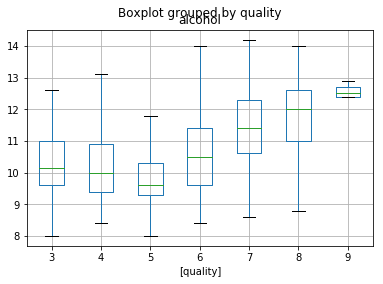

In [16]:
dataALC = data_clean[['quality','alcohol']]
dataALC.boxplot(by='quality',showfliers=False)

There is a clear difference in alcohol between the higher and lower quality wines.

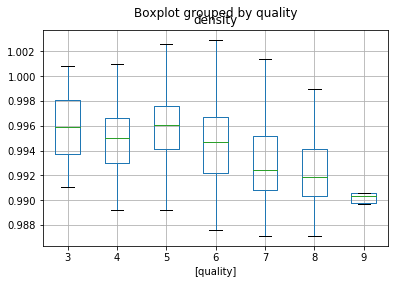

In [17]:
dataVTA = data_clean[['quality','density']]
dataVTA.boxplot(by='quality',showfliers=False)

There is a clear difference in density between the higher and lower quality wines.

As we can see, the higher and lower quality wines in this dataset differ in alcohol and density.

To answer the third question, let's find the wines with the lowest quality score and assign them to a dataframe.

In [18]:
data_clean['quality'].min()

3

In [19]:
dataworst = data_clean[data.quality == 3]

In [20]:
dataworst.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.0
mean,7.853333,0.517000,0.28100,5.140000,0.077033,39.216667,122.033333,0.995744,3.257667,0.506333,10.215000,3.0
std,1.747853,0.341913,0.17351,4.730721,0.062014,59.990327,112.141762,0.002833,0.213246,0.126994,1.106497,0.0
min,4.200000,0.170000,0.00000,0.700000,0.022000,3.000000,9.000000,0.991100,2.870000,0.280000,8.000000,3.0
25%,6.800000,0.252500,0.21250,1.650000,0.038750,5.250000,30.000000,0.993750,3.140000,0.407500,9.625000,3.0
50%,7.450000,0.415000,0.33000,3.150000,0.055000,17.000000,102.500000,0.995900,3.245000,0.505000,10.150000,3.0
75%,8.575000,0.632500,0.39500,7.800000,0.081000,37.375000,193.250000,0.998060,3.415000,0.565000,11.000000,3.0
max,11.800000,1.580000,0.66000,16.200000,0.267000,289.000000,440.000000,1.000800,3.630000,0.860000,12.600000,3.0


In [21]:
data_clean.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.295751,0.164548,0.145231,4.757392,0.035031,17.749400,56.521855,0.002999,0.160637,0.148768,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


If you compare the mean characteristics of the worst wines with the mean of all wines, you'll see that they are close together (within one standard deviation). This shows me that there might be reasons outside the composition of the wines that explain the low quality scores.

## Research proposal

In order to gain more information about this dataset, I would propose creating a classification method that predicts the type of wine (red/white) , or a bin of quality (high,average,low).
My questions would be:
1. How accurate can we make our predicton model?
2. What are some of the characterisitics of the wines that were misclassified by the model?